In [ ]:
!pip install qiskit ipywidgets

In [ ]:
!pip install discopy

### 1.1. Define the vocabulary

The first step to create a dataset is to define the words, their meaning and the word type. We have four three types of words: nouns, adjectives, verbs. We also distinguish two different types of verbs: transitive and intransitive.

In [ ]:
import numpy as np
import pickle

import qiskit
qiskit.__qiskit_version__

In [ ]:
!pip install regex
!pip install nltk

In [ ]:
!pip install os-sys
!pip install pandas

In [ ]:
import os
import nltk
import pandas
import re

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
# import matplotlib.font_manager as fm
# import matplotlib.pyplot as plt

# prop = fm.FontProperties(fname='kalpurush.ttf')
# m = u"কৃষক জমিতে ধান চাষ করে"
# x = 0.2
# y = 0.2
# plt.text(x, y, m, fontproperties=prop)
# plt.show()


In [ ]:
from discopy import Ty, Word # Import the classes for the type of word and for the word

s, n = Ty('s'), Ty('n') # Define the types s and n

# Define the words (notice that we include both meaning and grammar)

# nouns
purush = Word('পুরুষ', n)
mohila = Word('মহিলা', n)
shishu = Word('শিশু', n)

# adjectives
nirbod = Word('নির্বোধ', n @ n.l)

# Intransitive verbs
kade = Word('কাঁদে', n.r @ s)
hashe = Word('হাসে', n.r @ s)

# Transitive verbs
dukkho = Word('দুঃখ পায়', n.r @ s @ n.l)

nouns = [purush, mohila, shishu]
adjectives = [nirbod]
int_verbs = [kade, hashe]
t_verbs = [dukkho]


# # nouns
# man, woman, kid = Word('পুরুষ', n), Word('মহিলা', n), Word('বাচ্চা', n)

# # adjectives
# morose, irascible = Word('নির্বোধ', n @ n.l), Word('উত্তেজিত', n @ n.l)
# frightened, cheerful = Word('ভীত', n @ n.l), Word('আনন্দিত', n @ n.l)
# gloomy, furious = Word('বিষণ্ণ', n @ n.l), Word('ক্ষিপ্ত', n @ n.l)

# # Intransitive verbs
# cries, shouts = Word('কাঁদে', n.r @ s), Word('চিৎকার করে', n.r @ s)
# laughs = Word('হাসে', n.r @ s)

# # Transitive verbs
# grieves, startles = Word('দুঃখ পায়', n.r @ s @ n.l), Word('চমকে দেয়', n.r @ s @ n.l)
# entertains, irritates = Word('বিনোদন করে', n.r @ s @ n.l), Word('বিরক্ত করে', n.r @ s @ n.l)

# nouns = [man, woman, kid]
# adjectives = [morose, irascible, frightened, cheerful, gloomy, furious]
# int_verbs = [cries, shouts, laughs]
# t_verbs = [grieves, startles, entertains, irritates]

vocab = nouns + adjectives + int_verbs + t_verbs

In [ ]:
print(vocab)

[Word('পুরুষ', Ty('n')), Word('মহিলা', Ty('n')), Word('শিশু', Ty('n')), Word('নির্বোধ', Ty('n', Ob('n', z=-1))), Word('কাঁদে', Ty(Ob('n', z=1), 's')), Word('হাসে', Ty(Ob('n', z=1), 's')), Word('দুঃখ পায়', Ty(Ob('n', z=1), 's', Ob('n', z=-1)))]


### 1.2. Define the grammar

In this dataset we are going to consider the following structures to construct the sentences:

- adj + noun + int. verb
- noun + t. verb + noun
- adj + noun + t. verb + noun
- noun + t. verb + adj + noun

In [ ]:
print(cheerful)

cheerful


- noun + t. verb + adjective + noun (for english)

- noun + t. verb + adjective + noun (for Bangla)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

def change_matplotlib_font(font_download_url):
    FONT_PATH = 'MY_FONT'

    font_download_cmd = f"wget {font_download_url} -O {FONT_PATH}.zip"
    unzip_cmd = f"unzip -o {FONT_PATH}.zip -d {FONT_PATH}"
    os.system(font_download_cmd)
    os.system(unzip_cmd)

    font_files = fm.findSystemFonts(fontpaths=FONT_PATH)
    for font_file in font_files:
        fm.fontManager.addfont(font_file)

    font_name = fm.FontProperties(fname=font_files[0]).get_name()
    matplotlib.rc('font', family=font_name)
    print("font family: ", plt.rcParams['font.family'])

In [ ]:
font_download_url = "https://fonts.google.com/download?family=Noto%20Serif%20Bengali"
change_matplotlib_font(font_download_url)

font family:  ['Noto Serif Bengali SemiCondensed']


In [ ]:
from discopy import Cup, Id, pregroup

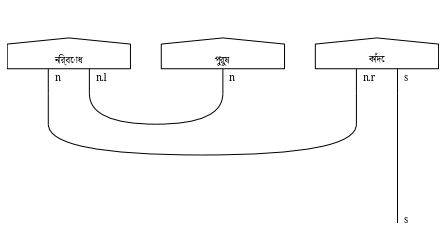

In [ ]:
# Intransitive sentence (does not require a direct object)
grammar =  Id(n) @ Cup(n.l, n) @ Id(n.r @ s) >> Cup(n, n.r) @ Id(s) >> Id(s)
sentence = nirbod @ purush @ kade >> grammar

# grammar =  Id(n) @ Cup(n.l, n) @ Id(n.r @ s) >> Cup(n, n.r) @ Id(s) >> Id(s)
# sentence = joyful @ woman @ laughs >> grammar

pregroup.draw(sentence)

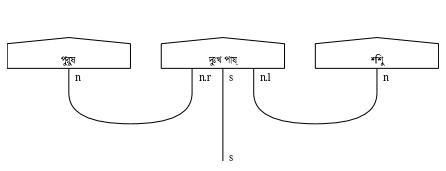

In [ ]:
# Transitive sentence (requires a direct object)
grammar =  Cup(n, n.r) @ Id(s) @ Cup(n.l, n)
sentence = purush @ dukkho @ shishu >> grammar
# পুরুষ দুঃখ দেয় শিশুকে

# grammar =  Cup(n, n.r) @ Id(s) @ Cup(n.l, n)
# sentence = man @ grieves @ kid >> grammar

pregroup.draw(sentence)

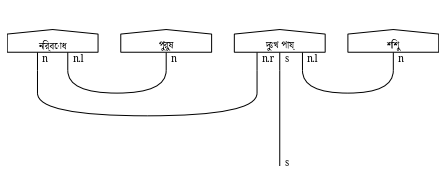

In [ ]:
# Transitive sentence (requires a direct object)
grammar =  Id(n) @ Cup(n.l, n) @ Id(n.r @ s) @ Cup(n.l, n) >> Cup(n, n.r) @ Id(s) >> Id(s)
sentence = nirbod @ purush @ dukkho @ shishu >> grammar
# পুরুষ দুঃখ দেয় শিশুকে

# grammar =  Cup(n, n.r) @ Id(s) @ Cup(n.l, n)
# sentence = man @ grieves @ kid >> grammar

pregroup.draw(sentence)

In [ ]:
from discopy import Diagram
from discopy.grammar import draw

# Store the grammatical structures of each sentence type in a dictionary


grammar_dict = {
    'ADJ_N_IV' : Id(n) @ Cup(n.l, n) @ Id(n.r @ s) >> Cup(n, n.r) @ Id(s) >> Id(s),
    'N_TV_N': Cup(n, n.r) @ Id(s) @ Cup(n.l, n),
    'ADJ_N_TV_N': Id(n) @ Cup(n.l, n) @ Id(n.r @ s) @ Cup(n.l, n) >> Cup(n, n.r) @ Id(s) >> Id(s),
    'N_TV_ADJ_N': Cup(n, n.r) @ Id(s) @ Cup(n.l, n) @ Cup(n.l, n) >> Id(s)}


# Create parsing (grammatical analysis) dictionary where the grammatical sentences
# are the keys and the associated values are the diagrams (words + grammar)

data_psr = {}

#Creates all possible sentences

# Intransitive sentences
parsing_int = {"{} {} {}.".format(adj, noun, int_verb): adj @ noun @ int_verb >> grammar_dict['ADJ_N_IV']
            for adj in adjectives for noun in nouns for int_verb in int_verbs}
sentences_int = list(parsing_int.keys())
for sentence in sentences_int:
    diagram = parsing_int[sentence]
    data_psr[sentence] = parsing_int[sentence]

# Transitive sentences (without adjective)
parsing_tra = {"{} {} {}.".format(subj, t_verb, obj):  subj @ t_verb @ obj >> grammar_dict['N_TV_N']
            for subj in nouns for t_verb in t_verbs for obj in nouns}


# Transitive sentences (with adjective)
parsing_tra_ladj = {"{} {} {} {}.".format(adj, subj, t_verb, obj):  adj @ subj @ t_verb @ obj >> grammar_dict['ADJ_N_TV_N']
            for adj in adjectives for subj in nouns for t_verb in t_verbs for obj in nouns}
parsing_tra_radj = {"{} {} {} {}.".format(subj, t_verb, adj, obj):  subj @ t_verb @ adj @ obj >> grammar_dict['N_TV_ADJ_N']
            for subj in nouns for t_verb in t_verbs for adj in adjectives for obj in nouns}

parsing_tra.update(parsing_tra_ladj) #merges transitive adjectives into original dict
parsing_tra.update(parsing_tra_radj)

sentences_tra = list(parsing_tra.keys())
for sentence in sentences_tra:
    diagram = parsing_tra[sentence]
    data_psr[sentence] = parsing_tra[sentence]

###  Process the data

In [ ]:
with open('sentiment_analysis_dataset.txt', encoding = 'utf-8') as f:
    data = f.readlines()

In [ ]:
print(data)

['নির্বোধ পুরুষ কাঁদে._int_1\n', 'নির্বোধ মহিলা কাঁদে._int_1\n', 'পুরুষ দুঃখ দেয় শিশুকে._tra_3\n', 'মহিলা দুঃখ দেয় শিশুকে._tra_3\n']


In [ ]:
for sentence in data:
  sentstr = sentence[:-7]
  print(sentstr)

নির্বোধ পুরুষ কাঁদে.
নির্বোধ মহিলা কাঁদে.
পুরুষ দুঃখ দেয় শিশুকে.
মহিলা দুঃখ দেয় শিশুকে.


sentence[:-7] #going up to but not including the last 7 chars.
> 0  1  2  3  4  5

> -6 -5 -4 -3 -2 -1

In [ ]:
print(sentence[:-1])
print("------------------")
print(sentence[:-7])

print("------------------")
print(sentence[-6:-3])

মহিলা দুঃখ দেয় শিশুকে._tra_3
------------------
মহিলা দুঃখ দেয় শিশুকে.
------------------
tra


In [ ]:
print(diagram)

শিশু >> Id(n) @ দুঃখ পায় >> Id(n @ n.r @ s @ n.l) @ নির্বোধ >> Id(n @ n.r @ s @ n.l @ n @ n.l) @ শিশু >> Cup(n, n.r) @ Id(s @ n.l @ n @ n.l @ n) >> Id(s) @ Cup(n.l, n) @ Id(n.l @ n) >> Id(s) @ Cup(n.l, n)


In [ ]:
labels_dict = {} # Dictionary with the labels for each sentence
data_psr_dict = {} # Dictionary with the parsing for each sentence
sent_type = {} # Dictionary with the sentence type for each sentence


adjective_words = [a.name for a in adjectives]
for sentence in data:
    sentstr = sentence[:-7] #seperates the sentence string from the data at the end
    if sentence[-6:-3] == 'int':
        print(sentstr)
        diagram = parsing_int[sentstr]
        data_psr_dict[sentstr] = diagram
        labels_dict[sentstr] = sentence[-2]
        sent_type[sentstr] = 'int'
    elif sentence[-6:-3] == 'tra':
        print(sentstr)
        #diagram = parsing_tra[sentstr]
        data_psr_dict[sentstr] = diagram
        labels_dict[sentstr] = sentence[-2]

        if len(sentstr.split()) == 4:
            if sentstr.split()[0] in adjective_words:
                sent_type[sentstr] = 'tra_' + 'l' #adjective on the left
            else:
                sent_type[sentstr] = 'tra_' + 'r' #adjective on the right
        else:
            sent_type[sentstr] = 'tra' #the simple transitive verb sentence type


নির্বোধ পুরুষ কাঁদে.
নির্বোধ মহিলা কাঁদে.
পুরুষ দুঃখ দেয় শিশুকে.
মহিলা দুঃখ দেয় শিশুকে.


In [ ]:
c0 = 0 #happy
c1 = 0 #sad 11
c2 = 0 #angry
c3 = 0 #scared 11
for value in labels_dict.values():
    if value == '0':
        c0 +=1
    elif value == '1':
        c1 += 1
    elif value == '2':
        c2 += 1
    elif value == '3':
        c3 += 1
print('Number of elements for each sentiment')
print('Happy: ', c0)
print('Sad: ', c1)
print('Angry: ', c2)
print('Scared: ', c3)
print('Total', len(data_psr_dict))

Number of elements for each sentiment
Happy:  0
Sad:  2
Angry:  0
Scared:  2
Total 4


In [ ]:
from discopy import Cap, Box

In [ ]:
# Code of this cell addapted from https://github.com/CQCL/qnlp_lorenz_etal_2021_resources
#iterates through all sentences and reshapes them as above according to their type

data_new_psr_dict = {}
for sentstr in data_psr_dict.keys():
    num_words = len(sentstr.split(' '))
    words = data_psr_dict[sentstr].boxes[:num_words]
    if sent_type[sentstr] == 'int':
        noun = Box(words[1].name, n.l, Ty())
        words_new = (Cap(n, n.l)) >> (words[0] @ Id(n) @ noun @ words[2])
        sentence = words_new >> grammar_dict['ADJ_N_IV']
        data_new_psr_dict[sentstr] = sentence.normal_form()
    elif 'tra' in sent_type[sentstr]:
        if sent_type[sentstr] == 'tra':
            noun1 = Box(words[0].name, n.r, Ty())
            noun2 = Box(words[2].name, n.l, Ty())
            words_new = (Cap(n.r, n) @ Cap(n, n.l)) >> (noun1 @ Id(n) @ words[1] @ Id(n) @ noun2)
            sentence = words_new >> grammar_dict['N_TV_N']
            data_new_psr_dict[sentstr] = sentence.normal_form()
        elif sent_type[sentstr] == 'tra_l': #adjective at beginning
            noun1 = Box(words[1].name, n.l, Ty())
            noun2 = Box(words[3].name, n.l, Ty())
            words_new = (Cap(n, n.l) @ Cap(n, n.l)) >> (words[0] @ Id(n) @ noun1 @ words[2] @ Id(n) @ noun2)
            sentence = words_new >> grammar_dict['ADJ_N_TV_N']
            data_new_psr_dict[sentstr] = sentence.normal_form()
        elif sent_type[sentstr] == 'tra_r': #adjective on second noun
            noun1 = Box(words[0].name, n.r, Ty())
            noun2 = Box(words[3].name, n.l, Ty())
            words_new = (Cap(n.r, n) @ Cap(n, n.l)) >> (noun1 @ Id(n) @ words[1] @ words[2] @ Id(n) @ noun2)
            sentence = words_new >> grammar_dict['N_TV_ADJ_N']
            data_new_psr_dict[sentstr] = sentence.normal_form()

AxiomError: ignored